To run this notebook, download the YOLO V3 weights and convert them using the command:

```
wget https://pjreddie.com/media/files/yolov3.weights -O weights/yolov3.weights

python convert.py --weights weights/yolov3.weights --output weights/yolov3.tf
```

# **Imports**

In [1]:
import time
from absl import app, flags, logging
from absl.flags import FLAGS
import cv2
import numpy as np
import tensorflow as tf
from models import YoloV3
from utils import draw_outputs, transform_images
import matplotlib.pyplot as plt

CLASSES_PATH = './coco.names'
WEIGHTS_PATH = './weights/yolov3.tf'
IMAGE_SIZE = 416

# **Load the model, the classes and the example image**

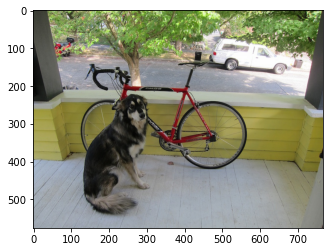

In [2]:
yolo = YoloV3()
yolo.load_weights(WEIGHTS_PATH)
class_names = [c.strip() for c in open(CLASSES_PATH).readlines()]

img = tf.image.decode_image(open('./dog_example.jpg', 'rb').read(), channels=3)
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

# **Run inference and display result**

	dog, 0.9977410435676575, [0.15920368 0.38621816 0.41723308 0.9451945 ]
	bicycle, 0.9901672005653381, [0.1532267  0.21770424 0.7412542  0.7511743 ]
	truck, 0.9378406405448914, [0.6156052  0.15119573 0.901889   0.2891039 ]


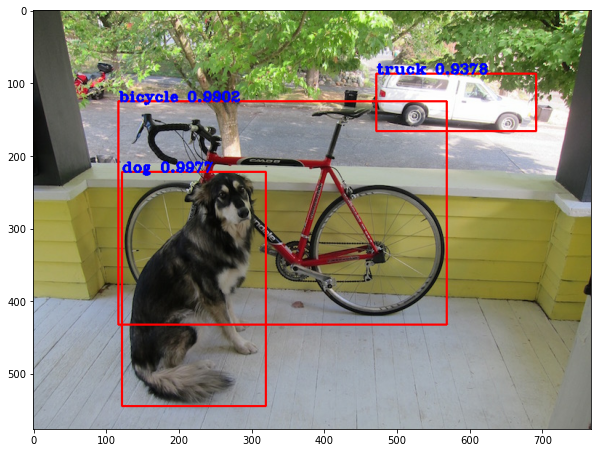

In [3]:
boxes, scores, classes, nums = yolo(input_img)

logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                               np.array(scores[0][i]),
                               np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)